In [8]:
from sklearn.datasets import load_iris, load_breast_cancer, fetch_lfw_people, load_digits, load_wine
from sklearn.datasets import make_blobs, make_circles

In [7]:
import numpy as np
import pandas as pas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


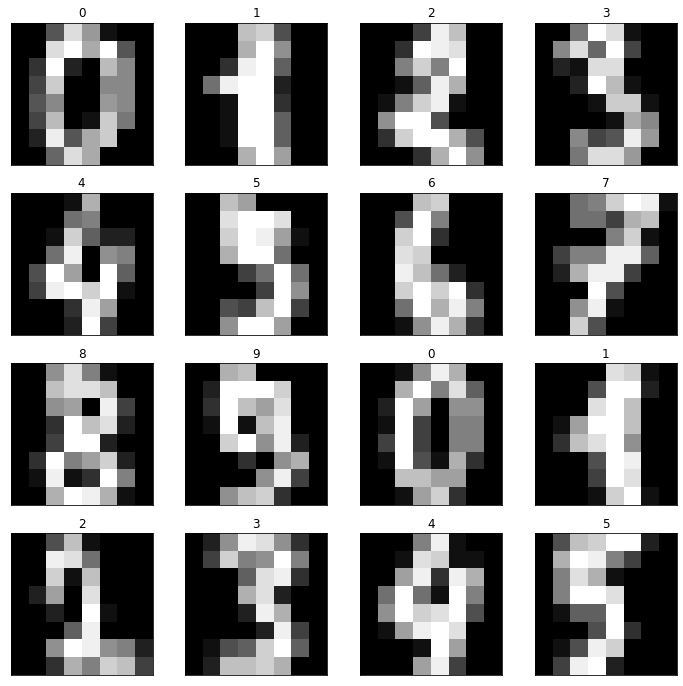

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [25]:
digits = load_digits()
print(digits.keys())

fig, axes = plt.subplots(4, 4, figsize = (12, 12), subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in zip(range(4 * 4), axes.ravel()):
    ax.imshow(digits.data[i].reshape(8, 8), cmap = 'gray')
    ax.set_title(digits.target[i])
    
plt.show()

print(digits.data[0])

In [22]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

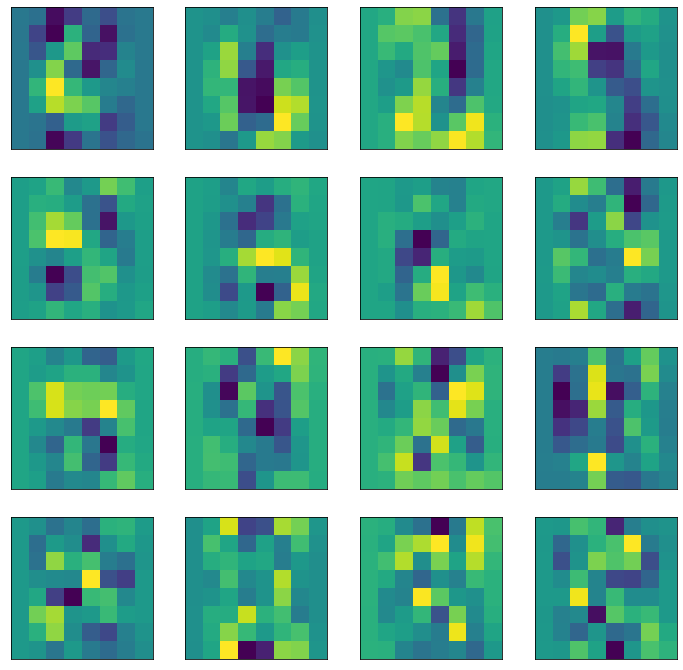

[ 5.14700252e-18 -1.73094658e-02 -2.23428828e-01 -1.35913303e-01
 -3.30322903e-02 -9.66341088e-02 -8.32943259e-03  2.26900370e-03
 -3.20516752e-04 -1.19308918e-01 -2.44451678e-01  1.48512713e-01
 -4.67319234e-02 -2.17740744e-01 -1.48136553e-02  4.47779866e-03
 -4.94137581e-05 -7.95419683e-02  8.33951630e-02  2.15915318e-01
 -1.72126806e-01 -1.63712090e-01  2.86444661e-02  4.23251977e-03
  9.85487807e-05  6.42318945e-02  2.54093334e-01 -3.56770947e-02
 -2.09462560e-01 -4.31311656e-02  5.13118631e-02  2.13422804e-04
 -0.00000000e+00  1.59950885e-01  3.68690771e-01  1.64406823e-01
  8.52007898e-02  3.72982811e-02  2.15867011e-02 -0.00000000e+00
  1.28865585e-03  1.06945292e-01  3.03067462e-01  2.47813047e-01
  2.09637283e-01  1.22325226e-02 -3.69458360e-02  1.61485068e-03
  6.93023534e-04 -8.35144474e-03 -5.58599146e-02  9.30534216e-02
  1.07387746e-01 -1.37734571e-01 -6.32879411e-02  9.61672536e-04
  9.55079193e-06 -1.40786849e-02 -2.35675481e-01 -1.41225598e-01
 -9.15964754e-03 -8.94184

In [29]:
pca = PCA(n_components = 4 * 4).fit(digits.data)

fig, axes = plt.subplots(4, 4, figsize = (12, 12), subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in zip(range(4 * 4), axes.ravel()):
    ax.imshow(pca.components_[i].reshape(8, 8))
    
plt.show()

print(pca.components_[0])

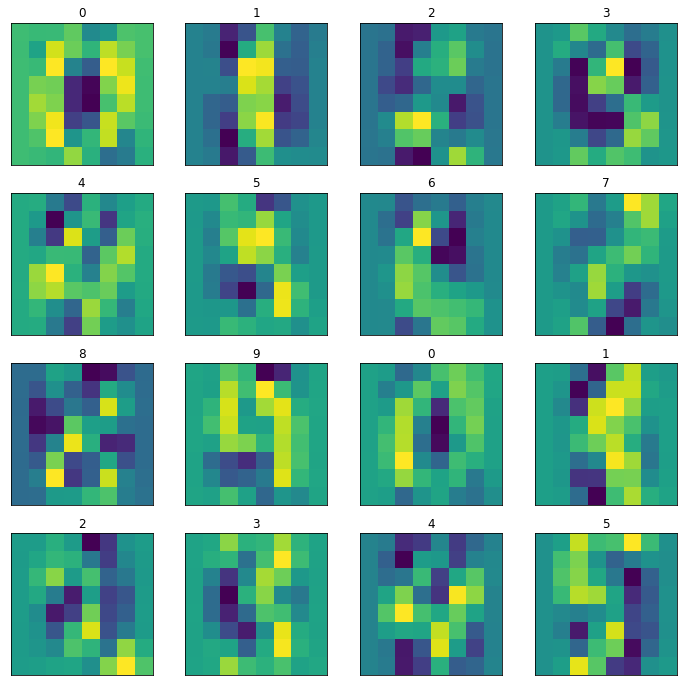

In [77]:
fig, axes = plt.subplots(4, 4, figsize = (12, 12), subplot_kw = {'xticks': [], 'yticks': []})
# print(pca.transform(digits.data[0].reshape(1, -1)).reshape(16,))
# print(pca.transform(digits.data[0].reshape(1, -1)).reshape(16,).shape)
# print(pca.components_)
# print(pca.components_.shape)
# a = np.array([1,2,3])
# print(a)
# print(a.shape)
# b = np.array([[1,2,-1,2],[4,0,2,1],[1,1,0,1]])
# print(b)
# print(b.shape)
# print(np.matmul(a, b))

for i, ax in zip(range(4 * 4), axes.ravel()):
    ax.imshow(np.matmul(pca.transform(digits.data[i].reshape(1, -1)).reshape(16,), pca.components_).reshape(8, 8))
    ax.set_title(digits.target[i])
    
plt.show()

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


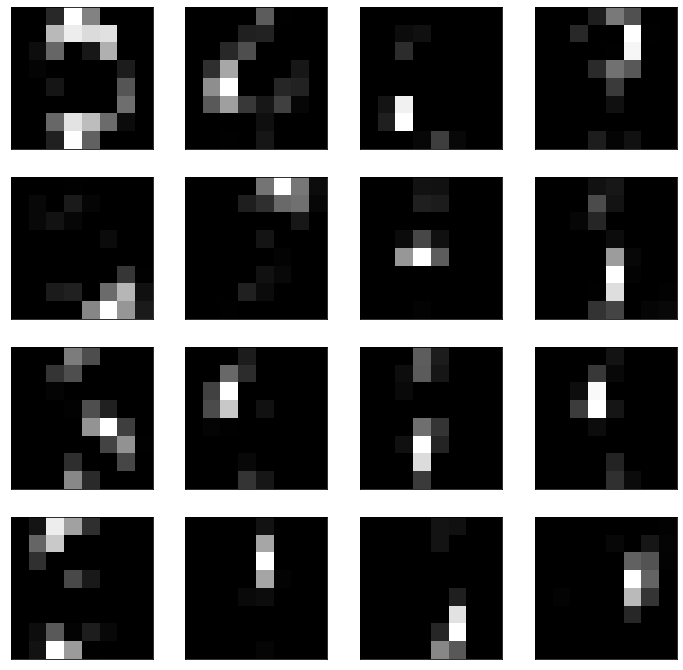

[0.         0.         1.38881083 8.68263876 4.43968747 0.
 0.         0.         0.         0.         6.29807204 8.04344979
 7.45148036 7.6500929  0.         0.         0.         0.46533516
 3.46927769 0.         0.80264468 5.98024538 0.         0.
 0.         0.16762712 0.         0.         0.         0.
 0.96228069 0.         0.         0.         0.72560416 0.
 0.         0.         2.88798335 0.         0.         0.
 0.         0.         0.         0.         3.7335916  0.
 0.         0.         3.52725688 7.72270418 6.42231424 3.65132045
 0.40495929 0.         0.         0.         1.13347936 8.62404828
 3.35289633 0.         0.         0.        ]


In [90]:
nmf = NMF(n_components = 4 * 4).fit(digits.data)

fig, axes = plt.subplots(4, 4, figsize = (12, 12), subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in zip(range(4 * 4), axes.ravel()):
    ax.imshow(nmf.components_[i].reshape(8, 8), cmap = 'gray')
    
plt.show()

print(nmf.components_[0])

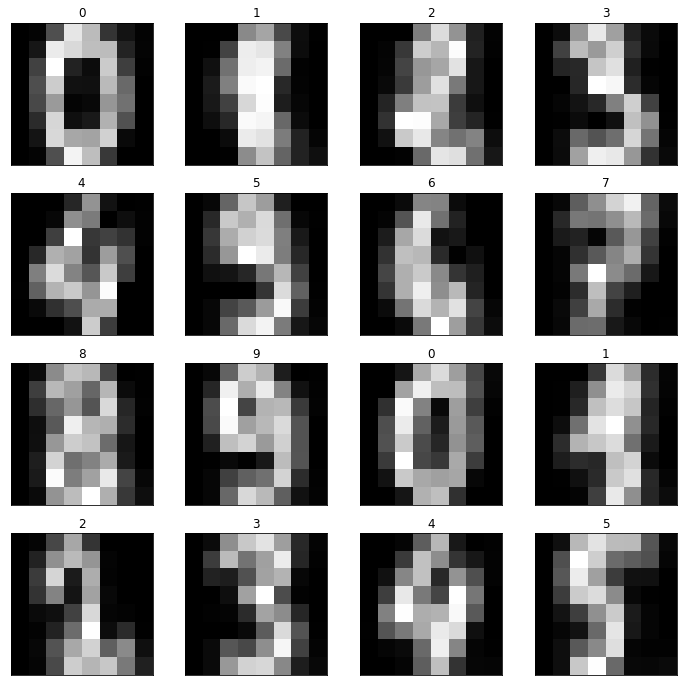

In [86]:
fig, axes = plt.subplots(4, 4, figsize = (12, 12), subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in zip(range(4 * 4), axes.ravel()):
    ax.imshow(np.matmul(nmf.transform(digits.data[i].reshape(1, -1)).reshape(16,), nmf.components_).reshape(8, 8), cmap = 'gray')
    ax.set_title(digits.target[i])
    
plt.show()

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


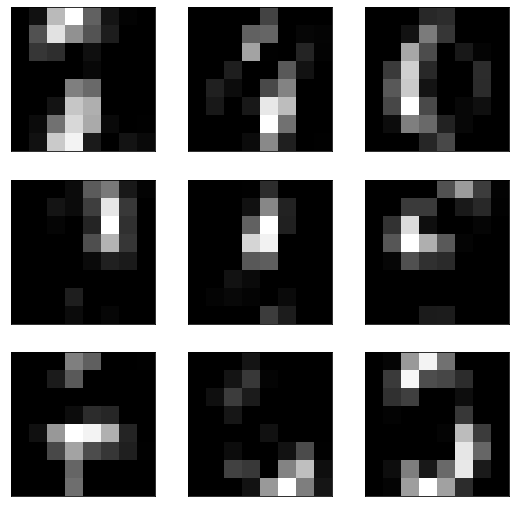

[0.00000000e+00 7.57238202e-01 8.02478839e+00 1.10160413e+01
 4.21891977e+00 8.96570291e-01 1.57942506e-01 0.00000000e+00
 8.70896561e-03 3.51275823e+00 9.74063601e+00 6.25263372e+00
 3.61200592e+00 1.28072733e+00 0.00000000e+00 0.00000000e+00
 4.48109061e-03 2.35430793e+00 1.98523532e+00 0.00000000e+00
 6.64594178e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.05303322e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.69693942e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.50095295e+00
 4.57341736e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.34062414e-01 8.52260376e+00
 7.55629696e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.95657969e-01 4.89844191e+00 9.32361160e+00
 7.35539970e+00 4.04637484e-01 0.00000000e+00 5.48730269e-02
 4.07667296e-04 7.35928193e-01 8.72350162e+00 1.04672590e+01
 1.14809800e+00 0.00000000e+00 8.22253538e-01 4.25124687e-01]


In [98]:
nmf = NMF(n_components = 9).fit(digits.data)

fig, axes = plt.subplots(3, 3, figsize = (9, 9), subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in zip(range(3 * 3), axes.ravel()):
    ax.imshow(nmf.components_[i].reshape(8, 8), cmap = 'gray')
    
plt.show()

print(nmf.components_[0])

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


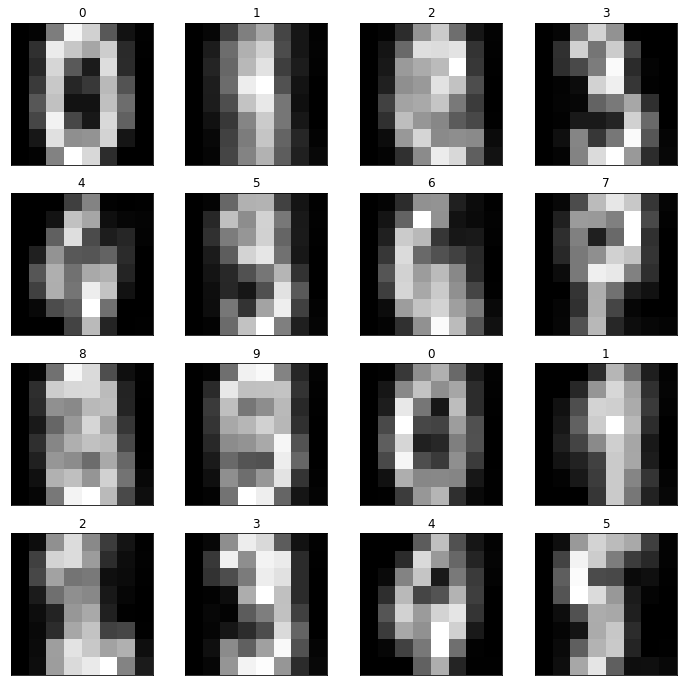

In [99]:
nmf = NMF(n_components = 9).fit(digits.data)

fig, axes = plt.subplots(4, 4, figsize = (12, 12), subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in zip(range(4 * 4), axes.ravel()):
    ax.imshow(np.matmul(nmf.transform(digits.data[i].reshape(1, -1)).reshape(9,), nmf.components_).reshape(8, 8), cmap = 'gray')
    ax.set_title(digits.target[i])
    
plt.show()

In [100]:
print(nmf.transform(digits.data))

[[0.         0.14672815 1.0720311  ... 0.         0.         0.9642936 ]
 [0.57037054 0.98970866 0.08144386 ... 0.37306071 0.23937875 0.        ]
 [0.34095286 0.47763973 0.72483929 ... 0.38042431 0.72007574 0.        ]
 ...
 [0.51345516 0.96858618 0.82356747 ... 0.44709019 0.27071371 0.11300494]
 [0.         0.5858835  0.14692187 ... 0.42902869 0.43566156 0.71850879]
 [0.02370468 0.20592188 0.80448875 ... 0.5893887  0.51240577 0.83519638]]


In [154]:
from sklearn.svm import SVC

X = digits.data
y = digits.target

r = 0

X_train, X_test = train_test_split(X, random_state = r)
y_train, y_test = train_test_split(y, random_state = r)

svc = SVC(kernel = 'rbf').fit(X_train, y_train)

print('Normal Train:\t', svc.score(X_train, y_train))
print('Normal Test:\t', svc.score(X_test, y_test))

print('')

n_components_list = [32, 16, 10, 8, 4]

for n in n_components_list:
    X_compressed = NMF(n_components = n, max_iter = 1000).fit_transform(digits.data)
    X_trainc, X_testc = train_test_split(X_compressed, random_state = r)

    svcc = SVC(kernel = 'rbf').fit(X_trainc, y_train)

    print(f'NMF {n} Train:\t', svcc.score(X_trainc, y_train))
    print(f'NMF {n} Test:\t', svcc.score(X_testc, y_test))
    
    print('')

    X_compressed = PCA(n_components = n).fit_transform(digits.data)
    X_trainc, X_testc = train_test_split(X_compressed, random_state = r)

    svcc = SVC(kernel = 'rbf').fit(X_trainc, y_train)

    print(f'PCA {n} Train:\t', svcc.score(X_trainc, y_train))
    print(f'PCA {n} Test:\t', svcc.score(X_testc, y_test))
    
    print('')

Normal Train:	 0.9948032665181886
Normal Test:	 0.9911111111111112

NMF 32 Train:	 0.9925760950259837
NMF 32 Test:	 0.9777777777777777

PCA 32 Train:	 0.9985152190051967
PCA 32 Test:	 0.9955555555555555

NMF 16 Train:	 0.9933184855233853
NMF 16 Test:	 0.9777777777777777

PCA 16 Train:	 0.9970304380103935
PCA 16 Test:	 0.9911111111111112

NMF 10 Train:	 0.9769858945805494
NMF 10 Test:	 0.9644444444444444

PCA 10 Train:	 0.991833704528582
PCA 10 Test:	 0.9733333333333334

NMF 8 Train:	 0.9524870081662955
NMF 8 Test:	 0.9266666666666666

PCA 8 Train:	 0.9762435040831478
PCA 8 Test:	 0.9622222222222222

NMF 4 Train:	 0.8203414996288048
NMF 4 Test:	 0.7577777777777778

PCA 4 Train:	 0.8923533778767632
PCA 4 Test:	 0.86



/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


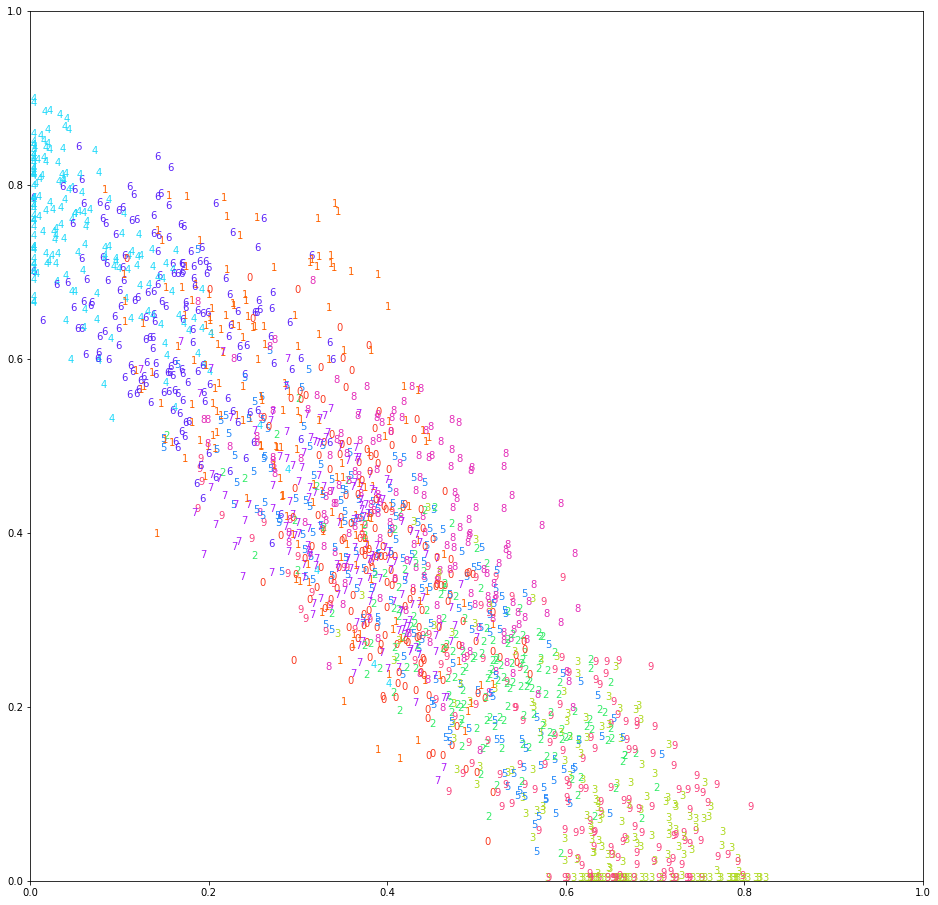

In [117]:
nmf = NMF(n_components = 2).fit(digits.data)
datac = nmf.transform(digits.data)

fig, ax = plt.subplots(1,1, figsize = (16,16))

colors = ['#FA3A20', '#FF6200', '#33EC68', '#AED91E', '#20D9FA', '#2086FA', '#5820FA', '#AE20FA', '#E42DB8', '#F9417C']

for i in range(datac.shape[0]):
    plt.text(datac[i,0] / 2, datac[i,1] / 2, digits.target[i], color = colors[digits.target[i]])
    
plt.show()

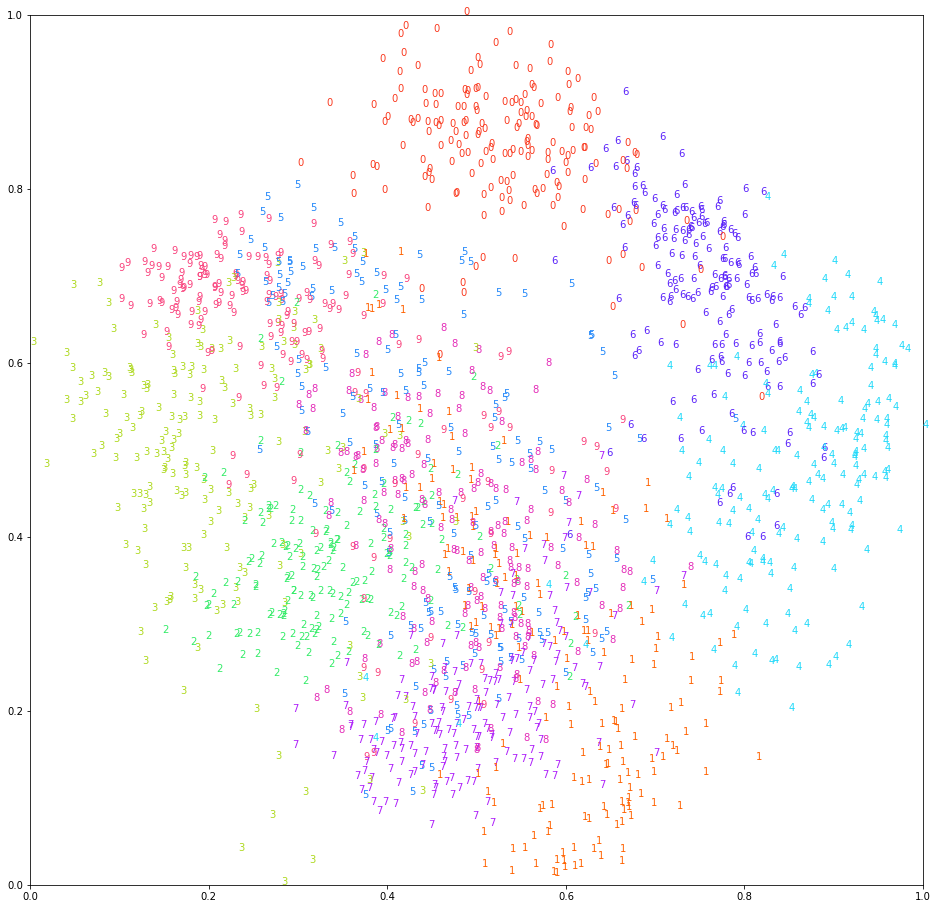

In [123]:
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components = 2).fit(digits.data)
datac = MinMaxScaler().fit_transform(pca.transform(digits.data))

fig, ax = plt.subplots(1,1, figsize = (16,16))

colors = ['#FA3A20', '#FF6200', '#33EC68', '#AED91E', '#20D9FA', '#2086FA', '#5820FA', '#AE20FA', '#E42DB8', '#F9417C']

for i in range(datac.shape[0]):
    plt.text(datac[i,0], datac[i,1], digits.target[i], color = colors[digits.target[i]])
    
plt.show()

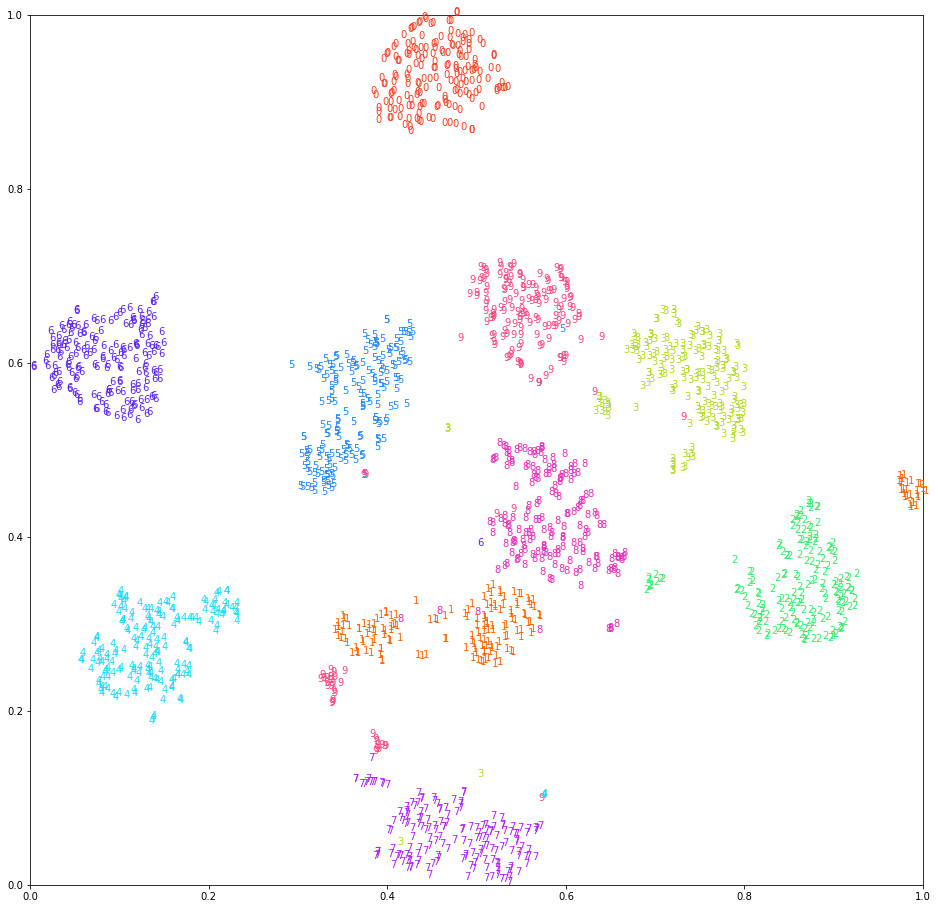

In [127]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1,1, figsize = (16, 16))

colors = ['#FA3A20', '#FF6200', '#33EC68', '#AED91E', '#20D9FA', '#2086FA', '#5820FA', '#AE20FA', '#E42DB8', '#F9417C']

datac = MinMaxScaler().fit_transform(TSNE().fit_transform(digits.data))

for i in range(datac.shape[0]):
    plt.text(datac[i, 0], datac[i, 1], digits.target[i], color = colors[digits.target[i]])
    
plt.show()

In [184]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

Xc = PCA(n_components = 16).fit_transform(digits.data)
agg = AgglomerativeClustering(n_clusters = 10)
dbs = DBSCAN(eps = 15, min_samples = 4)

print(agg.fit_predict(Xc))
print(adjusted_rand_score(agg.fit_predict(Xc), digits.target))
print(dbs.fit_predict(Xc))
print(np.bincount(dbs.labels_ + 1))
print(adjusted_rand_score(dbs.labels_, digits.target))

[7 9 5 ... 5 5 5]
0.7430090541182445
[ 0  1 -1 ... -1  6 -1]
[337 170  84 125 163 168  53 254 138 139   2  29   6  42   6  13  11  26
   9  10   4   4   4]
0.5646627449718867


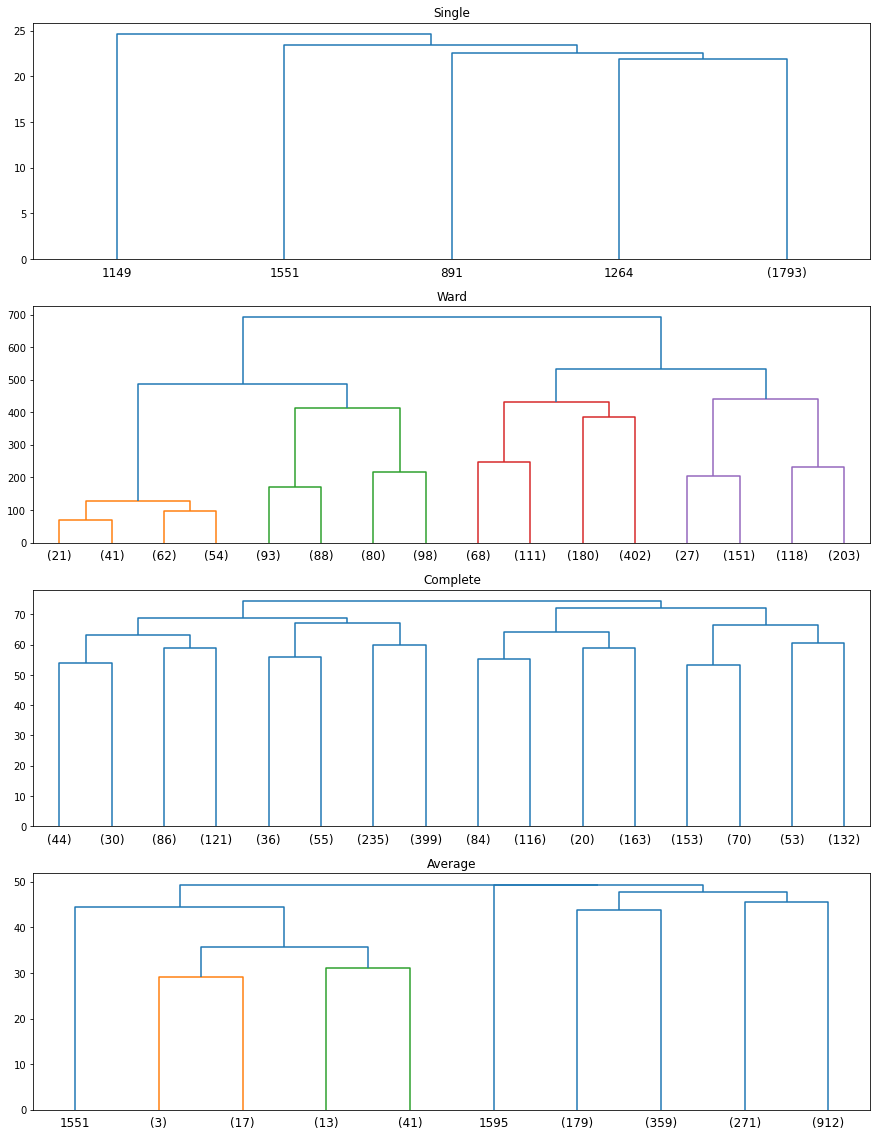

In [192]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig, axes = plt.subplots(4,1, figsize = (15,20))

methods = ['single', 'ward', 'complete', 'average']

for method, ax in zip(methods, axes.ravel()):
    Z = linkage(Xc, method)
    dendrogram(Z, p = 3, truncate_mode = 'level', ax = ax)
    ax.set_title(method.capitalize())

plt.show()